# HDAS7004 HW7 : Comprehensive Sleep Health and Lifestyle Analysis Report

## 1. Introduction & Objectives

This analysis aims to examine the **Sleep Health and Lifestyle Dataset** through two complementary approaches:

1. **Regression Analysis**: Predicting the **Quality of Sleep** (scale 4-9)
2. **Classification Analysis**: Identifying **Sleep Disorders** (None, Insomnia, Sleep Apnea)

The dual approach provides comprehensive insights into factors affecting both sleep quality and sleep disorders, with potential applications for early detection and intervention strategies.

---

## 2. Dataset Overview

- **Source**: [Kaggle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)
- **Size**: 374 records (after cleaning from original 400)
- **Data Types**:
  - **Categorical**: `Gender`, `Occupation`, `BMI Category`, `Sleep Disorder`
  - **Numerical**: `Age`, `Sleep Duration`, `Physical Activity Level`, `Stress Level`, `Heart Rate`, `Daily Steps`, `Blood Pressure` (split into Systolic and Diastolic)

### 2.1 Target Variables
- **Regression Target**: Quality of Sleep (integer scale from 4 to 9)
- **Classification Target**: Sleep Disorder
  - Class distribution:
    - None: 219 (58.6%)
    - Sleep Apnea: 78 (20.9%)
    - Insomnia: 77 (20.6%)

### 2.2 Summary Statistics of Key Numerical Features

| Feature | Mean | Std | Min | 25% | 50% | 75% | Max |
|--------|------|-----|-----|-----|-----|-----|-----|
| Sleep Duration | 7.13 | 0.80 | 5.8 | 6.4 | 7.2 | 7.8 | 8.5 |
| Quality of Sleep | 7.31 | 1.20 | 4.0 | 6.0 | 7.0 | 8.0 | 9.0 |
| Physical Activity Level | 59.17 | 20.83 | 30 | 45 | 60 | 75 | 90 |
| Stress Level | 5.39 | 1.77 | 3 | 4 | 5 | 7 | 8 |
| Daily Steps | 6816.84 | 1617.92 | 3000 | 5600 | 7000 | 8000 | 10000 |

---

## 3. Methodology

### 3.1 Data Preprocessing
- Handled missing values
- Removed duplicate records
- Split blood pressure into systolic and diastolic components
- Feature encoding:
  - Gender: Binary encoding (Male: 0, Female: 1)
  - BMI Category: Ordinal encoding (Normal: 0, Overweight: 1, Obese: 2)
  - Occupation: One-hot encoding

### 3.2 Modeling Approaches

For both regression and classification tasks, we compared two approaches:
1. **Tree-Based Models**: Decision Tree (Regressor/Classifier)
2. **Ensemble Learning Models**: Random Forest (Regressor/Classifier)

### 3.3 Model Development & Tuning

All models underwent hyperparameter optimization using GridSearchCV with 5-fold cross-validation.

---

## 4. Regression Analysis: Predicting Sleep Quality

### 4.1 Decision Tree Regressor

**Best Parameters**:
```json
{
  "regressor__max_depth": null,
  "regressor__min_samples_leaf": 2,
  "regressor__min_samples_split": 10
}
```

#### Performance Metrics:
| Metric | Training | Testing |
|--------|----------|---------|
| R² | 0.9828 | 0.9788 |
| MSE | 0.0240 | 0.0319 |
| RMSE | 0.1549 | 0.1787 |
| MAE | 0.0394 | 0.0524 |

#### Top Features:
- Sleep Duration: **0.8535**
- Stress Level: **0.0508**
- Occupation (Doctor): **0.0465**
- Heart Rate: **0.0319**

### 4.2 Random Forest Regressor

**Best Parameters**:
```json
{
  "regressor__n_estimators": 200,
  "regressor__max_depth": null,
  "regressor__min_samples_split": 2,
  "regressor__min_samples_leaf": 1
}
```

#### Performance Metrics:
| Metric | Training | Testing |
|--------|----------|---------|
| R² | 0.9965 | 0.9838 |
| MSE | 0.0048 | 0.0244 |
| RMSE | 0.0695 | 0.1561 |
| MAE | 0.0183 | 0.0439 |

### 4.3 Regression Models Comparison

| Metric | Decision Tree (Test) | Random Forest (Test) |
|--------|----------------------|-----------------------|
| R²     | 0.9788               | **0.9838**            |
| MSE    | 0.0319               | **0.0244**            |
| RMSE   | 0.1787               | **0.1561**            |
| MAE    | 0.0524               | **0.0439**            |

✅ **Random Forest Regressor** outperformed the Decision Tree across all metrics, demonstrating better generalization capabilities.

---

## 5. Classification Analysis: Predicting Sleep Disorders

### 5.1 Decision Tree Classifier

**Best Parameters**:
```json
{
  "classifier__max_depth": 5,
  "classifier__min_samples_leaf": 4,
  "classifier__min_samples_split": 2
}
```

#### Performance Metrics:
- Cross-Validation Accuracy: **0.889**
- Test Accuracy: **0.929**

#### Class-wise Performance:
| Class | Precision | Recall | F1-Score |
|-------|-----------|--------|----------|
| Insomnia | 0.952 | 0.870 | 0.909 |
| None | 0.955 | 0.970 | 0.962 |
| Sleep Apnea | 0.840 | 0.875 | 0.857 |

### 5.2 Random Forest Classifier

**Best Parameters**:
```json
{
  "classifier__max_depth": null,
  "classifier__min_samples_leaf": 2,
  "classifier__min_samples_split": 5,
  "classifier__n_estimators": 50
}
```

#### Performance Metrics:
- Cross-Validation Accuracy: **0.893**
- Test Accuracy: **0.938**

#### Class-wise Performance:
| Class | Precision | Recall | F1-Score |
|-------|-----------|--------|----------|
| Insomnia | 0.950 | 0.826 | 0.884 |
| None | 0.985 | 0.985 | 0.985 |
| Sleep Apnea | 0.815 | 0.917 | 0.863 |

### 5.3 Classification Models Comparison

Like the regression task, Random Forest slightly outperformed the Decision Tree in overall accuracy. However, class-specific performance revealed interesting trade-offs:

- **'None' Class**: Random Forest performed better (F1: 0.985 vs. 0.962)
- **'Insomnia' Class**: Decision Tree performed better (F1: 0.909 vs. 0.884)
- **'Sleep Apnea' Class**: Random Forest had better recall (0.917 vs. 0.875) but Decision Tree had better precision (0.840 vs. 0.815)

---

## 6. Discussion & Insights

### 6.1 Model Performance Analysis

#### Regression Models:
- Random Forest Regressor demonstrated superior performance with higher R² (0.9838) and lower error metrics
- Both models identified Sleep Duration as the dominant predictor of sleep quality

#### Classification Models:
- Random Forest Classifier achieved marginally better overall accuracy (93.8% vs. 92.9%)
- Decision Tree showed better balance in precision and recall for certain classes
- Random Forest excelled at identifying individuals without sleep disorders (98.5% F1-score)

### 6.2 Model Selection Trade-offs

| Aspect | Decision Tree | Random Forest |
|--------|--------------|---------------|
| Overall Performance | Good | Better |
| Interpretability | Better | More complex |
| Computational Cost | Lower | Higher |
| Class Balance | More balanced for insomnia | Better for 'None' and sleep apnea recall |

### 6.3 Clinical Relevance

- The high Sleep Apnea recall (91.7%) achieved by Random Forest is clinically valuable, as missing cases can have serious health consequences
- Decision Tree's balanced performance across classes might be preferred in general screening applications
- Sleep Duration emerged as the most important predictor for sleep quality, highlighting its significance for intervention strategies

---

## 7. Conclusion & Future Work

### Key Findings:
- **Sleep Duration** is consistently the most important predictor for sleep quality
- **Random Forest models** generally outperform Decision Trees for both regression and classification tasks
- There are **clinical trade-offs** between model choices based on specific detection priorities

### Future Research Directions:
- Perform SHAP analysis for better model interpretability
- Explore boosting algorithms (XGBoost, LightGBM) for potentially improved performance
- Integrate external lifestyle or health monitoring data for richer feature sets
- Develop combined models that can predict both sleep quality and disorders simultaneously
- Investigate the relationships between specific sleep disorders and quality of sleep metrics

### Practical Applications:
- Development of screening tools for early sleep disorder detection
- Design of personalized sleep improvement recommendations based on lifestyle factors
- Risk stratification for targeted interventions in clinical settings

---

## 8. Appendix : Code and Visualization

Dataset shape: (374, 13)

Dataset columns: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

Data types:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

Basic statistics for numeric columns:
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.67313

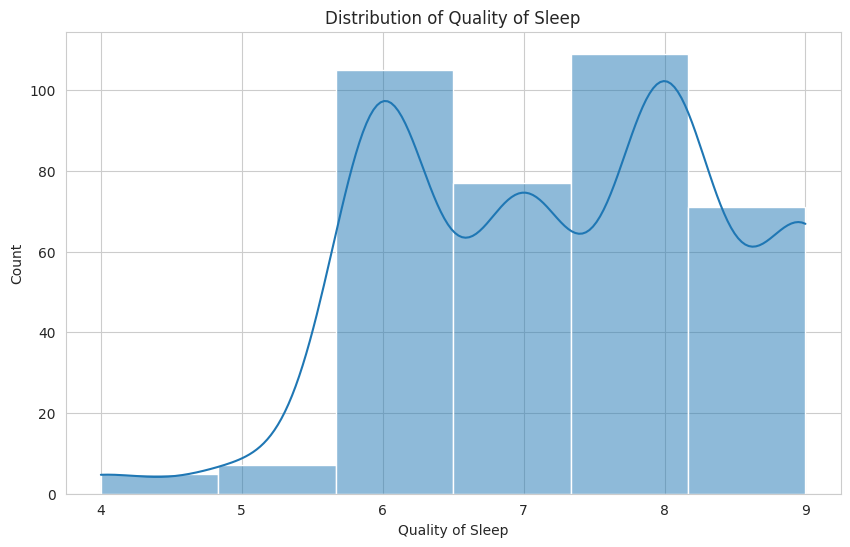


Categorical columns: ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
Numerical columns: ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']

=== DECISION TREE REGRESSOR ===
Best Decision Tree parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 10}

Training set metrics:
R² score: 0.9828
MSE: 0.0240
RMSE: 0.1549
MAE: 0.0394

Test set metrics:
R² score: 0.9788
MSE: 0.0319
RMSE: 0.1787
MAE: 0.0524


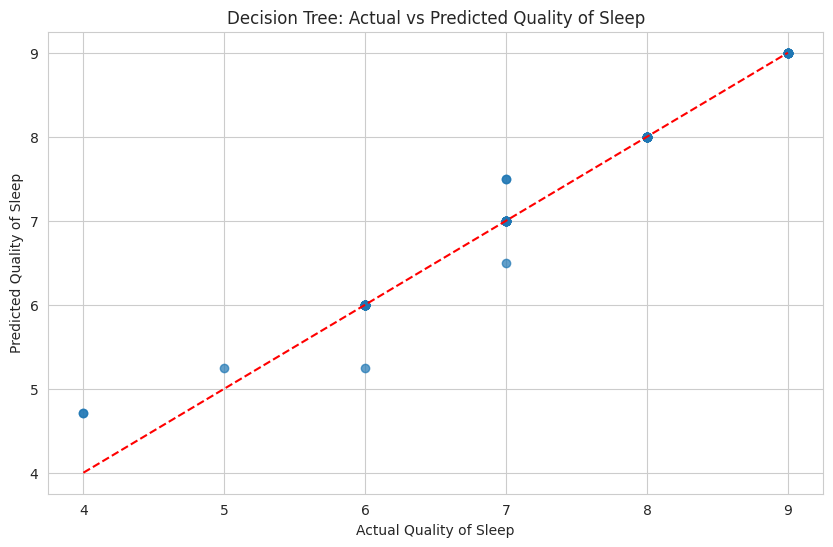


=== RANDOM FOREST REGRESSOR ===
Best Random Forest parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}

Training set metrics:
R² score: 0.9965
MSE: 0.0048
RMSE: 0.0695
MAE: 0.0183

Test set metrics:
R² score: 0.9838
MSE: 0.0244
RMSE: 0.1561
MAE: 0.0439


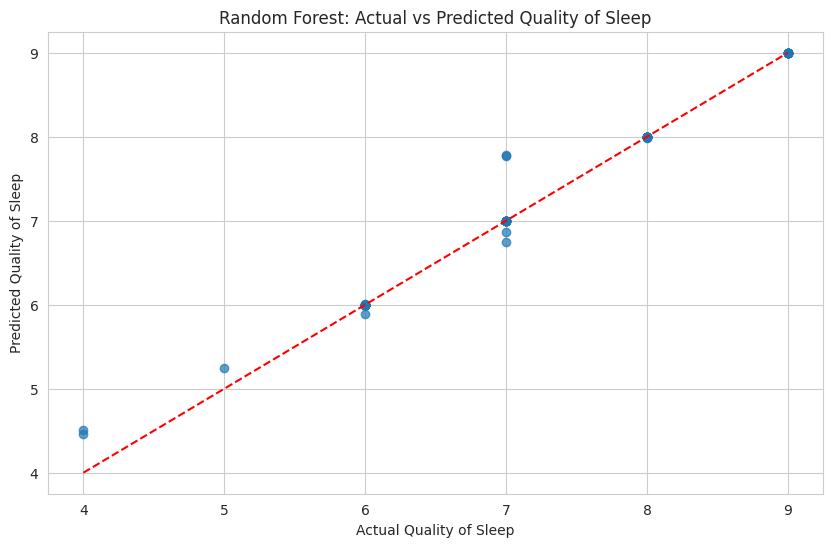

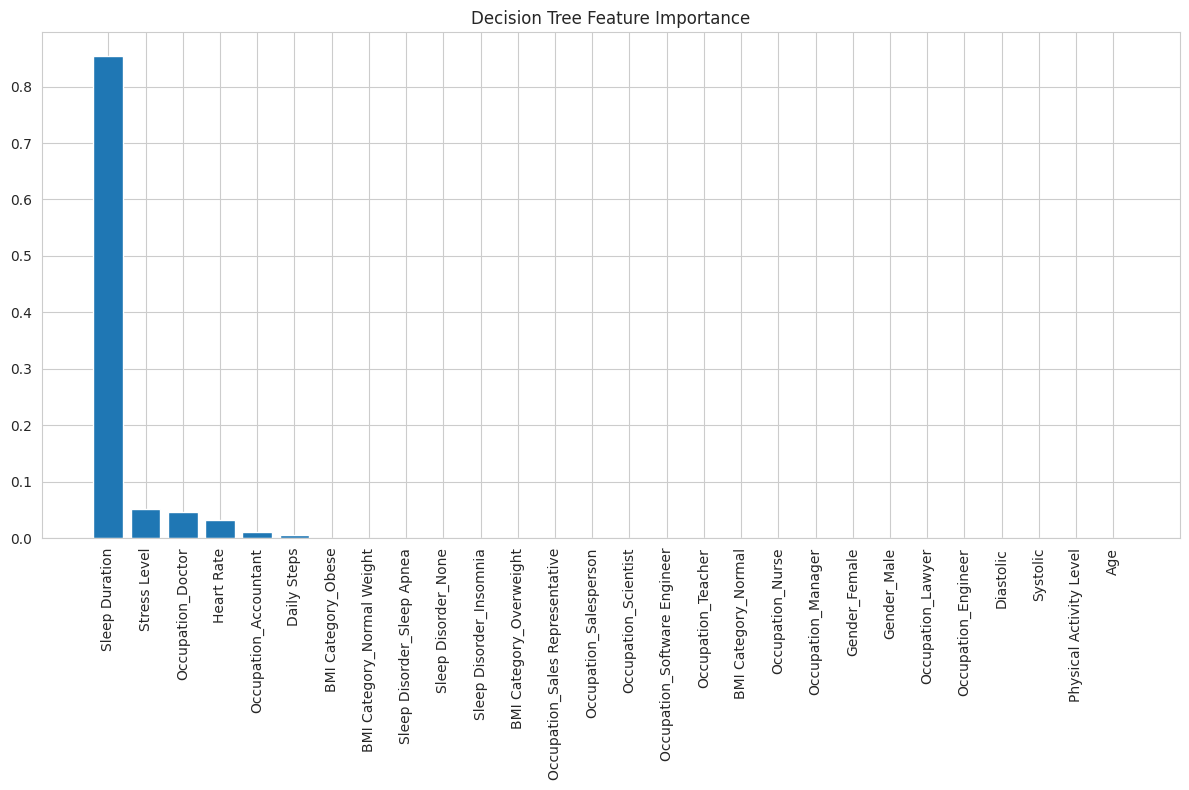


Decision Tree Feature Importance:
Sleep Duration: 0.8535
Stress Level: 0.0508
Occupation_Doctor: 0.0465
Heart Rate: 0.0319
Occupation_Accountant: 0.0115
Daily Steps: 0.0058
BMI Category_Obese: 0.0000
BMI Category_Normal Weight: 0.0000
Sleep Disorder_Sleep Apnea: 0.0000
Sleep Disorder_None: 0.0000
Sleep Disorder_Insomnia: 0.0000
BMI Category_Overweight: 0.0000
Occupation_Sales Representative: 0.0000
Occupation_Salesperson: 0.0000
Occupation_Scientist: 0.0000
Occupation_Software Engineer: 0.0000
Occupation_Teacher: 0.0000
BMI Category_Normal: 0.0000
Occupation_Nurse: 0.0000
Occupation_Manager: 0.0000
Gender_Female: 0.0000
Gender_Male: 0.0000
Occupation_Lawyer: 0.0000
Occupation_Engineer: 0.0000
Diastolic: 0.0000
Systolic: 0.0000
Physical Activity Level: 0.0000
Age: 0.0000


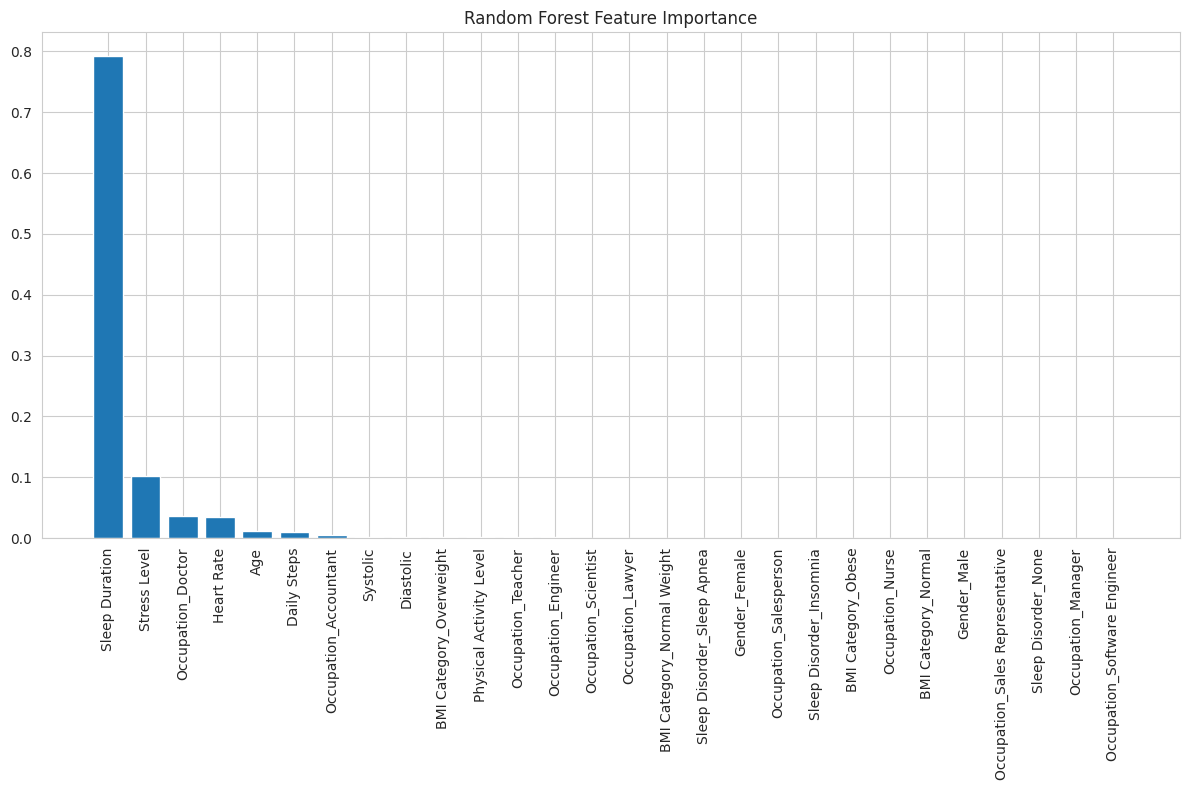


Random Forest Feature Importance:
Sleep Duration: 0.7917
Stress Level: 0.1016
Occupation_Doctor: 0.0356
Heart Rate: 0.0339
Age: 0.0111
Daily Steps: 0.0094
Occupation_Accountant: 0.0048
Systolic: 0.0020
Diastolic: 0.0019
BMI Category_Overweight: 0.0017
Physical Activity Level: 0.0013
Occupation_Teacher: 0.0011
Occupation_Engineer: 0.0009
Occupation_Scientist: 0.0008
Occupation_Lawyer: 0.0004
BMI Category_Normal Weight: 0.0003
Sleep Disorder_Sleep Apnea: 0.0003
Gender_Female: 0.0002
Occupation_Salesperson: 0.0002
Sleep Disorder_Insomnia: 0.0002
BMI Category_Obese: 0.0002
Occupation_Nurse: 0.0001
BMI Category_Normal: 0.0001
Gender_Male: 0.0001
Occupation_Sales Representative: 0.0001
Sleep Disorder_None: 0.0000
Occupation_Manager: 0.0000
Occupation_Software Engineer: 0.0000

=== MODEL COMPARISON ===


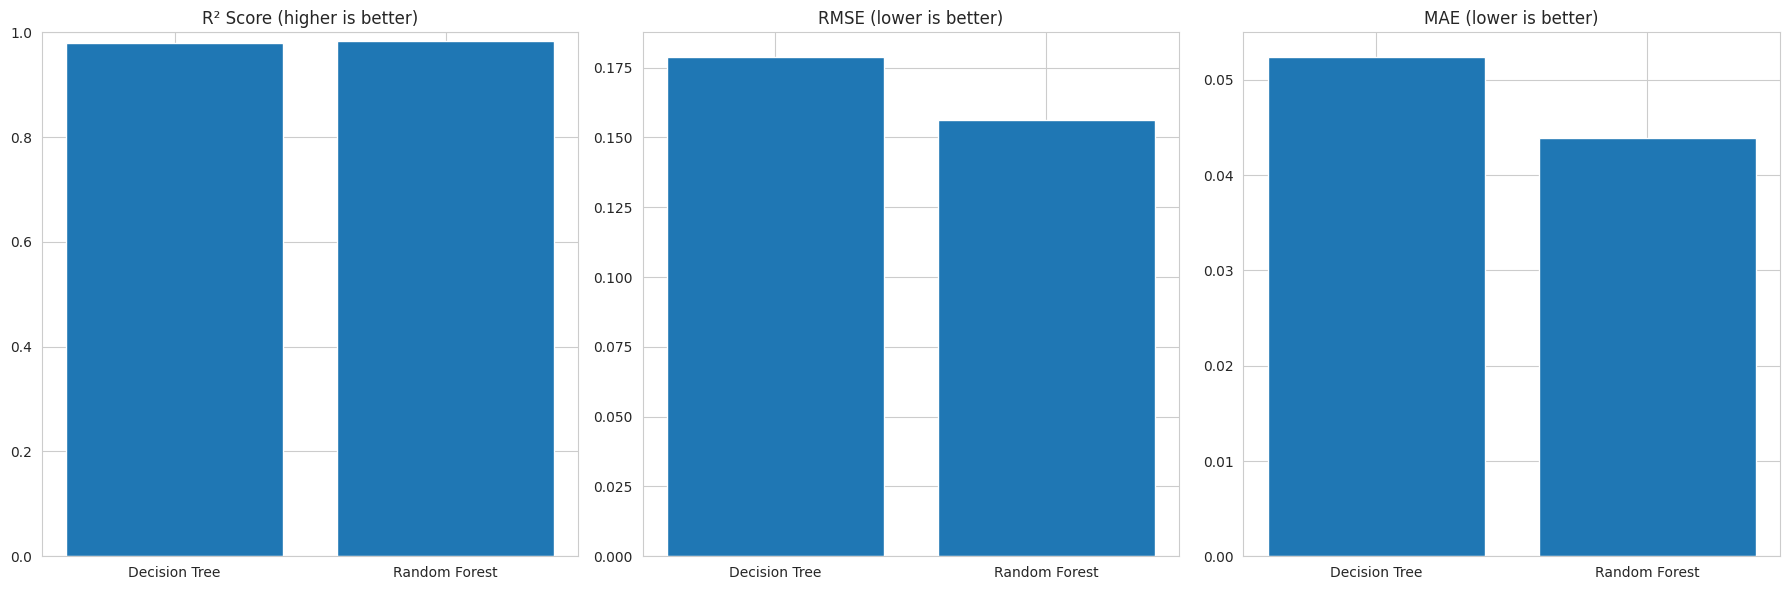

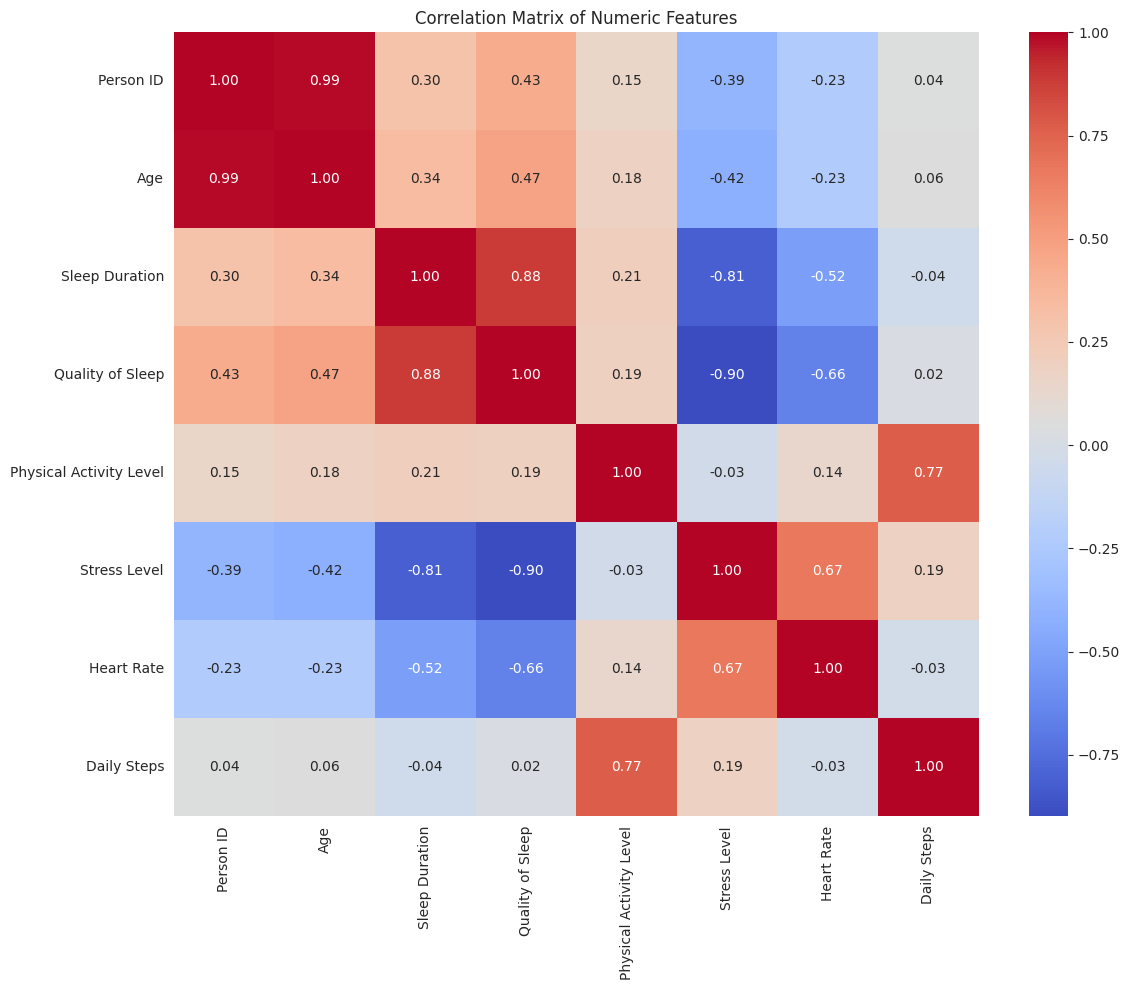


Model Performance Summary:
           Model   Test R²  Test RMSE  Test MAE
0  Decision Tree  0.978829   0.178714  0.052381
1  Random Forest  0.983840   0.156137  0.043867


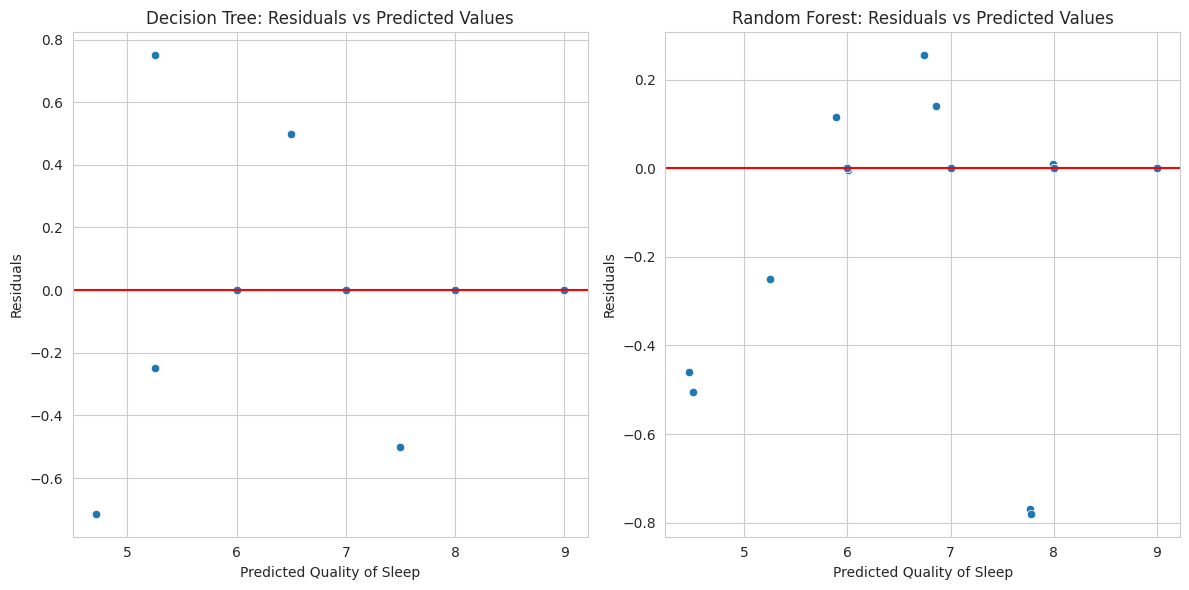

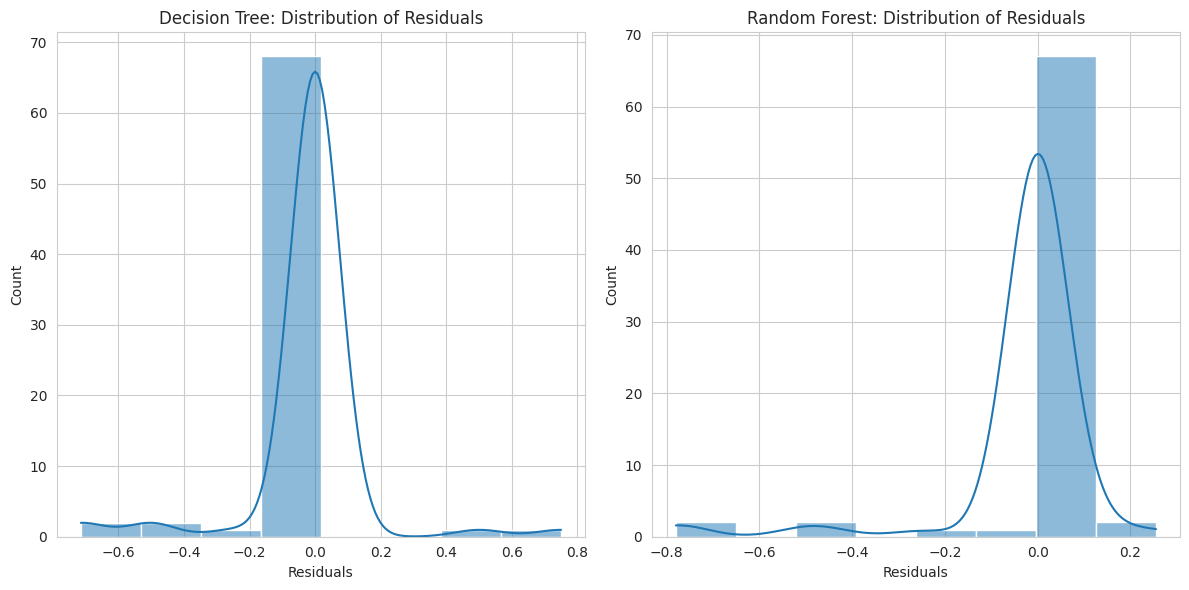

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

# Set the plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
df = pd.read_csv('/home/iismtl519-2/.cache/kagglehub/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2/Sleep_health_and_lifestyle_dataset.csv')

# Data Preprocessing
# Replace missing values in the 'Sleep Disorder' column with 'None'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
# Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

# Check data info
print("Dataset shape:", df.shape)
print("\nDataset columns:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)

# Basic statistics for numeric columns
print("\nBasic statistics for numeric columns:")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numeric_cols].describe())

# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Quality of Sleep'], bins=6, kde=True)
plt.title('Distribution of Quality of Sleep')
plt.show()

# Split Blood Pressure into systolic and diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Preprocess data for modeling
# Drop Person ID as it's not relevant for prediction
X = df.drop(['Person ID', 'Quality of Sleep', 'Blood Pressure'], axis=1)
y = df['Quality of Sleep']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Feature importance analysis function
def plot_feature_importance(model, feature_names, title):
    # Get feature importances
    importances = model.feature_importances_
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align='center')
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

    # Print feature importance
    print(f"\n{title}:")
    for i in indices:
        print(f"{feature_names[i]}: {importances[i]:.4f}")

# 1. TREE-BASED MODEL: Decision Tree Regressor
print("\n=== DECISION TREE REGRESSOR ===")

# Create pipeline
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Hyperparameter tuning with GridSearchCV
param_grid_dt = {
    'regressor__max_depth': [None, 5, 10, 15, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(
    dt_pipeline, param_grid_dt, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_
print("Best Decision Tree parameters:", grid_search_dt.best_params_)

# Evaluate on training set
y_train_pred_dt = best_dt.predict(X_train)
print("\nTraining set metrics:")
print(f"R² score: {r2_score(y_train, y_train_pred_dt):.4f}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred_dt):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_dt)):.4f}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred_dt):.4f}")

# Evaluate on test set
y_test_pred_dt = best_dt.predict(X_test)
print("\nTest set metrics:")
print(f"R² score: {r2_score(y_test, y_test_pred_dt):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred_dt):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_dt)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred_dt):.4f}")

# Get preprocessed feature names for feature importance
preprocessed_X_train = preprocessor.fit_transform(X_train)
feature_names = numerical_cols.copy()
# Get transformed categorical feature names
ohe = preprocessor.named_transformers_['cat']
cat_feature_names = []
for i, col in enumerate(categorical_cols):
    cat_feature_names.extend([f"{col}_{category}" for category in ohe.categories_[i]])
feature_names.extend(cat_feature_names)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_dt, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quality of Sleep')
plt.ylabel('Predicted Quality of Sleep')
plt.title('Decision Tree: Actual vs Predicted Quality of Sleep')
plt.show()

# Extract feature importance from the Decision Tree
dt_feature_importance = best_dt.named_steps['regressor'].feature_importances_

# 2. ENSEMBLE LEARNING MODEL: Random Forest Regressor
print("\n=== RANDOM FOREST REGRESSOR ===")

# Create pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Hyperparameter tuning with GridSearchCV
param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(
    rf_pipeline, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest parameters:", grid_search_rf.best_params_)

# Evaluate on training set
y_train_pred_rf = best_rf.predict(X_train)
print("\nTraining set metrics:")
print(f"R² score: {r2_score(y_train, y_train_pred_rf):.4f}")
print(f"MSE: {mean_squared_error(y_train, y_train_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_rf)):.4f}")
print(f"MAE: {mean_absolute_error(y_train, y_train_pred_rf):.4f}")

# Evaluate on test set
y_test_pred_rf = best_rf.predict(X_test)
print("\nTest set metrics:")
print(f"R² score: {r2_score(y_test, y_test_pred_rf):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_test_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_rf)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_test_pred_rf):.4f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Quality of Sleep')
plt.ylabel('Predicted Quality of Sleep')
plt.title('Random Forest: Actual vs Predicted Quality of Sleep')
plt.show()

# Plot feature importance for both models
if hasattr(best_dt.named_steps['regressor'], 'feature_importances_'):
    plot_feature_importance(
        best_dt.named_steps['regressor'],
        feature_names,
        'Decision Tree Feature Importance'
    )

if hasattr(best_rf.named_steps['regressor'], 'feature_importances_'):
    plot_feature_importance(
        best_rf.named_steps['regressor'],
        feature_names,
        'Random Forest Feature Importance'
    )

# Compare model performance
print("\n=== MODEL COMPARISON ===")
models = ['Decision Tree', 'Random Forest']
test_r2 = [r2_score(y_test, y_test_pred_dt), r2_score(y_test, y_test_pred_rf)]
test_rmse = [
    np.sqrt(mean_squared_error(y_test, y_test_pred_dt)),
    np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
]
test_mae = [
    mean_absolute_error(y_test, y_test_pred_dt),
    mean_absolute_error(y_test, y_test_pred_rf)
]

# Plot comparison
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].bar(models, test_r2)
ax[0].set_title('R² Score (higher is better)')
ax[0].set_ylim([0, 1])

ax[1].bar(models, test_rmse)
ax[1].set_title('RMSE (lower is better)')

ax[2].bar(models, test_mae)
ax[2].set_title('MAE (lower is better)')

plt.tight_layout()
plt.show()

# Create correlation matrix and visualize it
plt.figure(figsize=(12, 10))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Create a summary table of model performance
performance_df = pd.DataFrame({
    'Model': models,
    'Test R²': test_r2,
    'Test RMSE': test_rmse,
    'Test MAE': test_mae
})
print("\nModel Performance Summary:")
print(performance_df)

# Examine residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
residuals_dt = y_test - y_test_pred_dt
sns.scatterplot(x=y_test_pred_dt, y=residuals_dt)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Decision Tree: Residuals vs Predicted Values')
plt.xlabel('Predicted Quality of Sleep')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
residuals_rf = y_test - y_test_pred_rf
sns.scatterplot(x=y_test_pred_rf, y=residuals_rf)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Random Forest: Residuals vs Predicted Values')
plt.xlabel('Predicted Quality of Sleep')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Examine distribution of residuals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_dt, kde=True)
plt.title('Decision Tree: Distribution of Residuals')
plt.xlabel('Residuals')

plt.subplot(1, 2, 2)
sns.histplot(residuals_rf, kde=True)
plt.title('Random Forest: Distribution of Residuals')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

Dataset shape: (374, 13)

Data types:
Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

Missing values:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

Class distribution:
Sleep Disorder
None           219
Sleep Apnea     78
Insomnia    

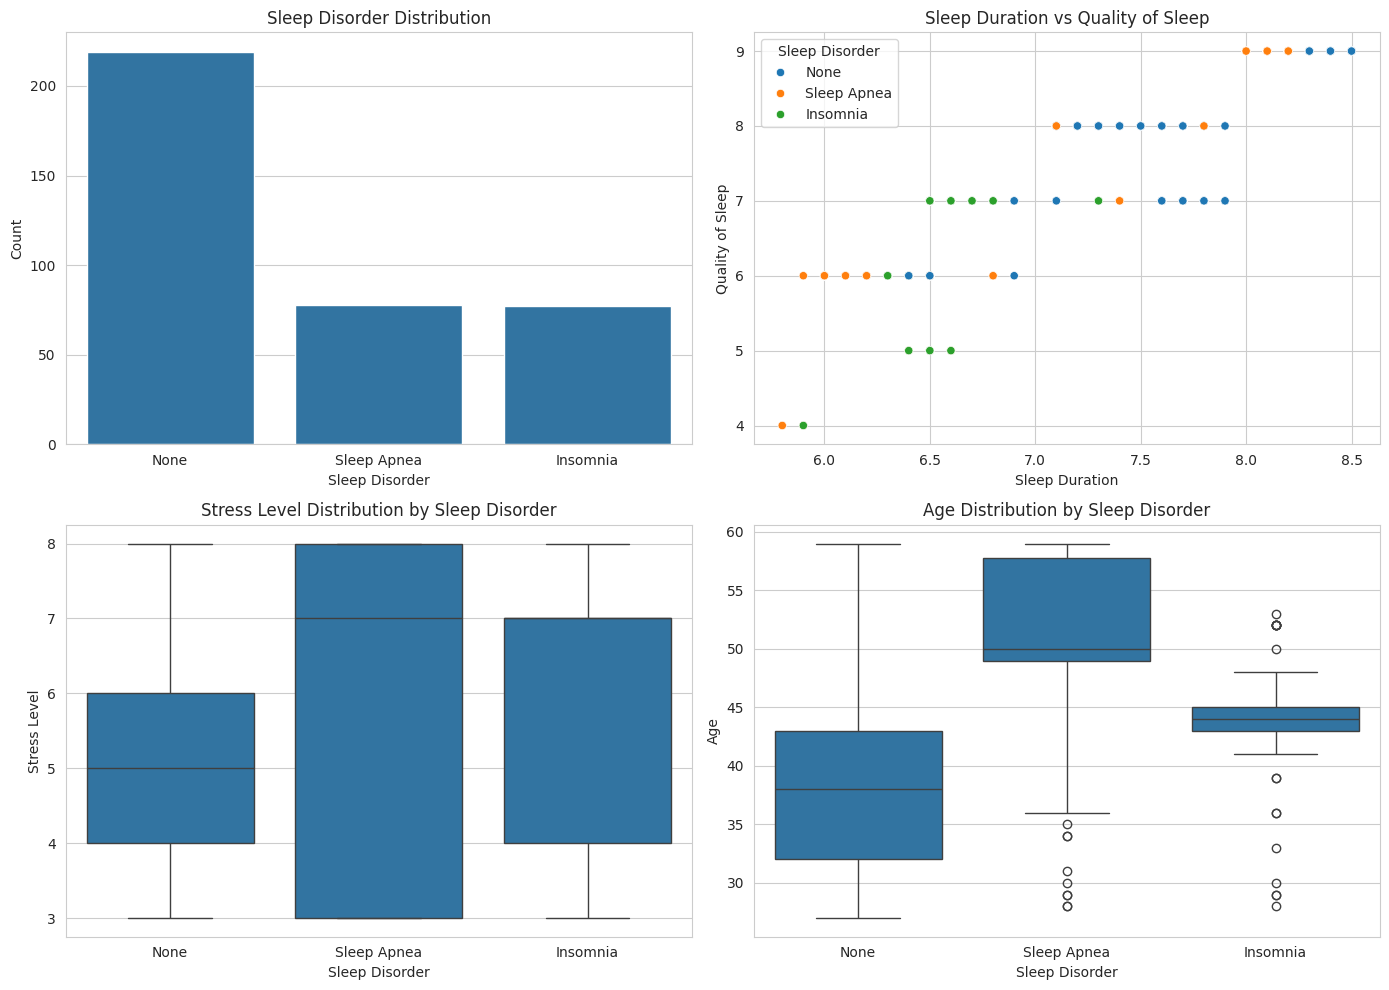

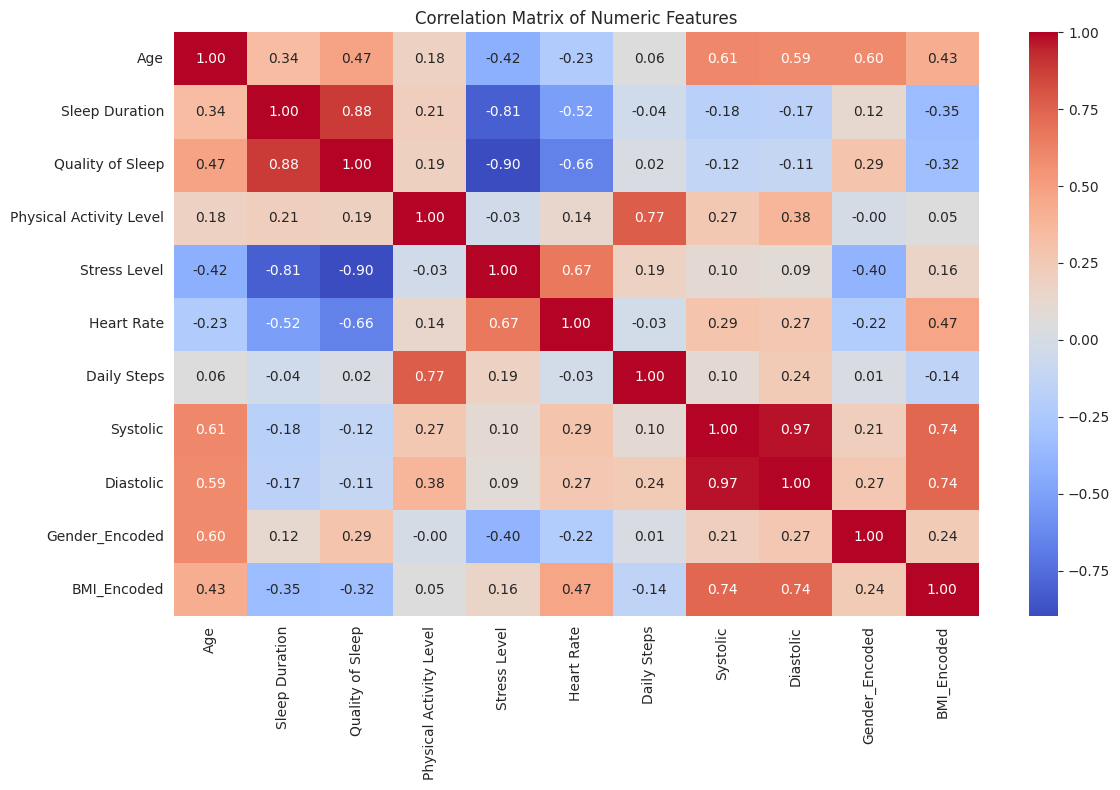


===== Decision Tree Classifier =====
Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.8890

Decision Tree Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.95      0.87      0.91        23
        None       0.96      0.97      0.96        66
 Sleep Apnea       0.84      0.88      0.86        24

    accuracy                           0.93       113
   macro avg       0.92      0.90      0.91       113
weighted avg       0.93      0.93      0.93       113



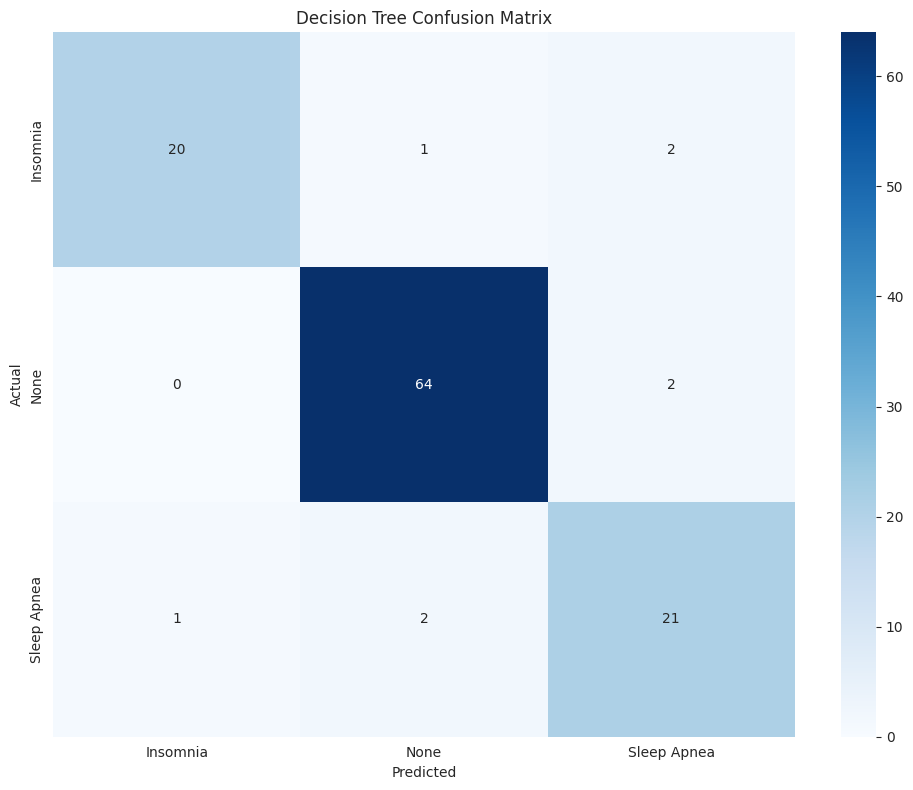

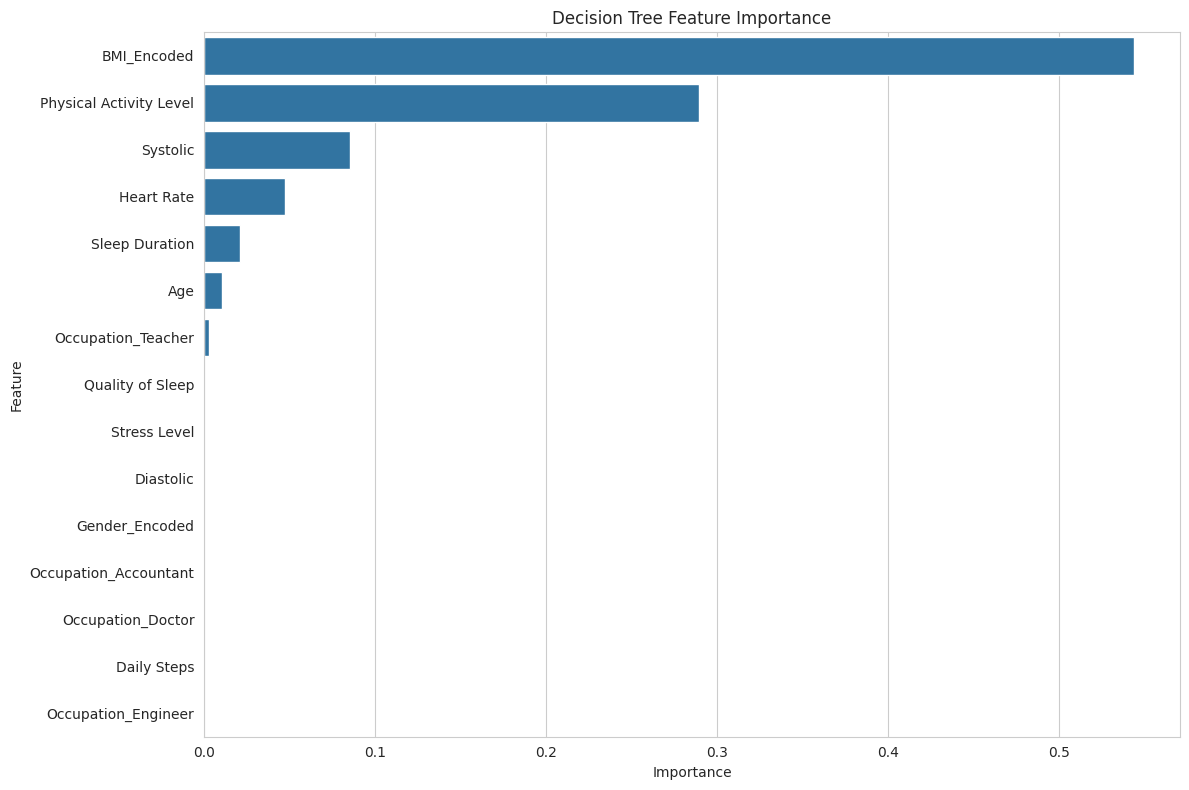


===== Random Forest Classifier =====
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 0.8929

Random Forest Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.95      0.83      0.88        23
        None       0.98      0.98      0.98        66
 Sleep Apnea       0.81      0.92      0.86        24

    accuracy                           0.94       113
   macro avg       0.92      0.91      0.91       113
weighted avg       0.94      0.94      0.94       113



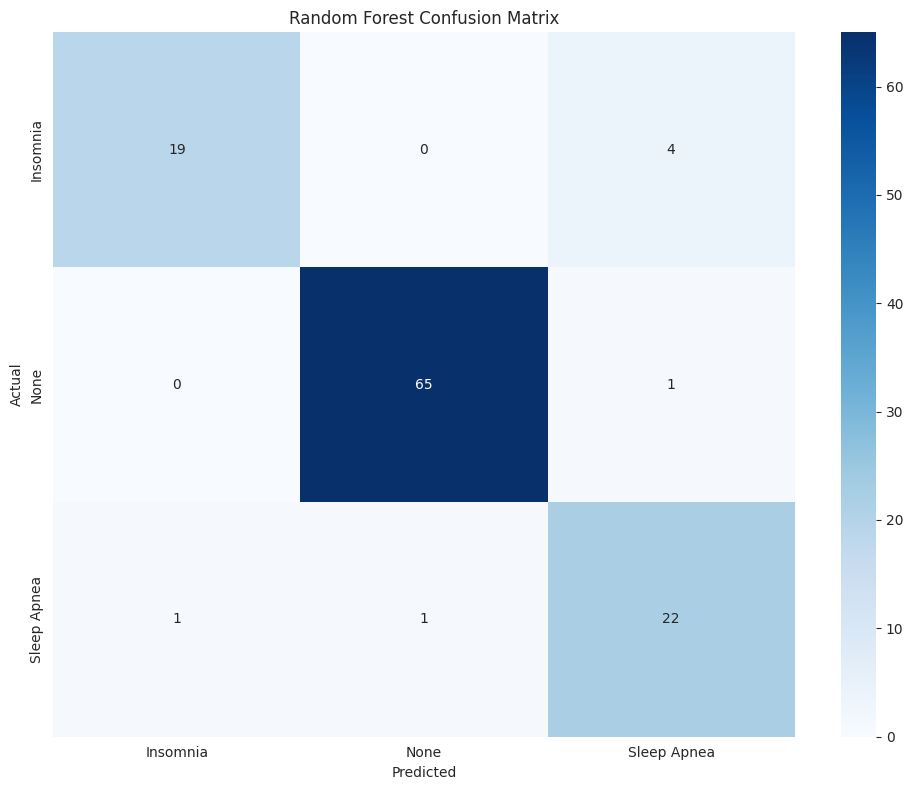

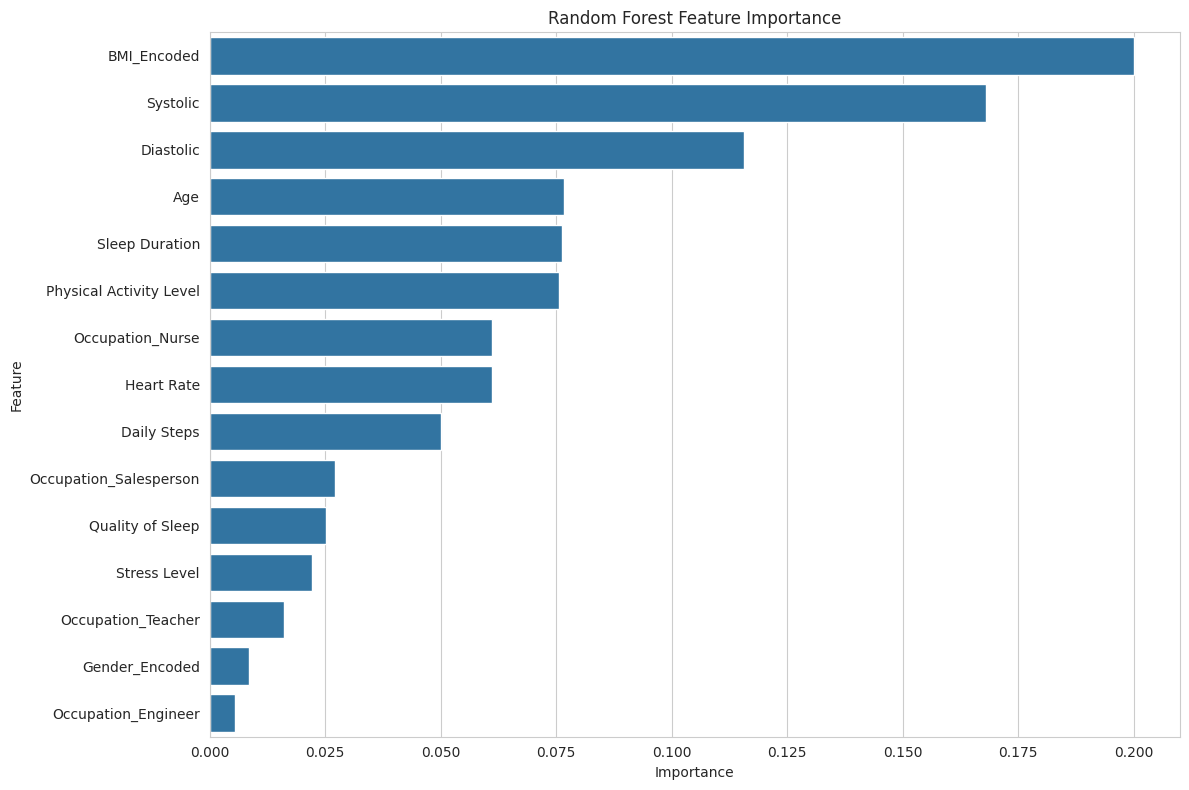

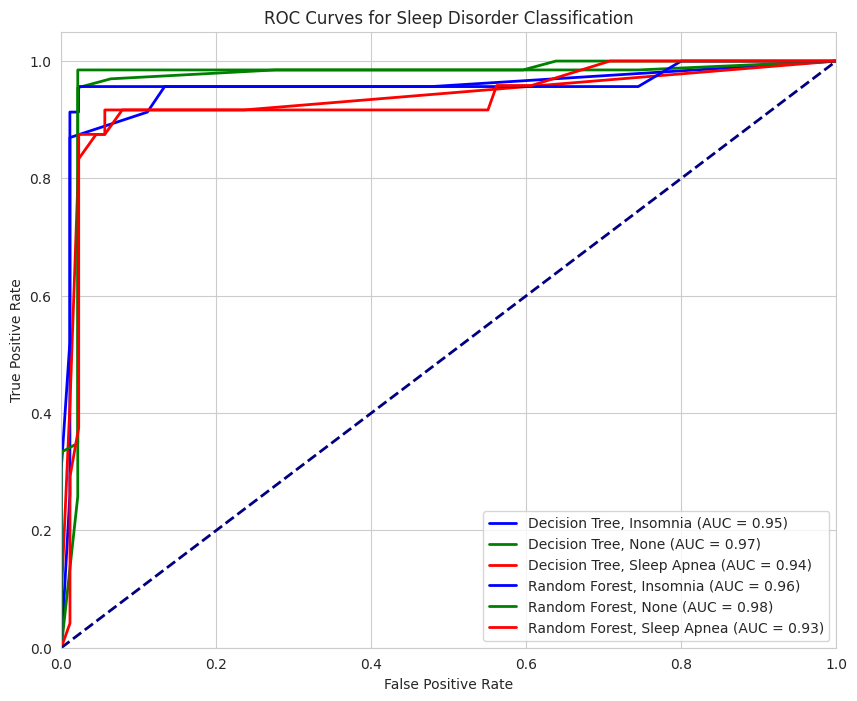


Model Comparison:
           Model  CV Accuracy  Test Accuracy
0  Decision Tree     0.889042       0.929204
1  Random Forest     0.892888       0.938053

Class-wise Performance Metrics:
           Model        Class  Precision    Recall  F1-Score
0  Decision Tree     Insomnia   0.952381  0.869565  0.909091
1  Random Forest     Insomnia   0.950000  0.826087  0.883721
2  Decision Tree         None   0.955224  0.969697  0.962406
3  Random Forest         None   0.984848  0.984848  0.984848
4  Decision Tree  Sleep Apnea   0.840000  0.875000  0.857143
5  Random Forest  Sleep Apnea   0.814815  0.916667  0.862745


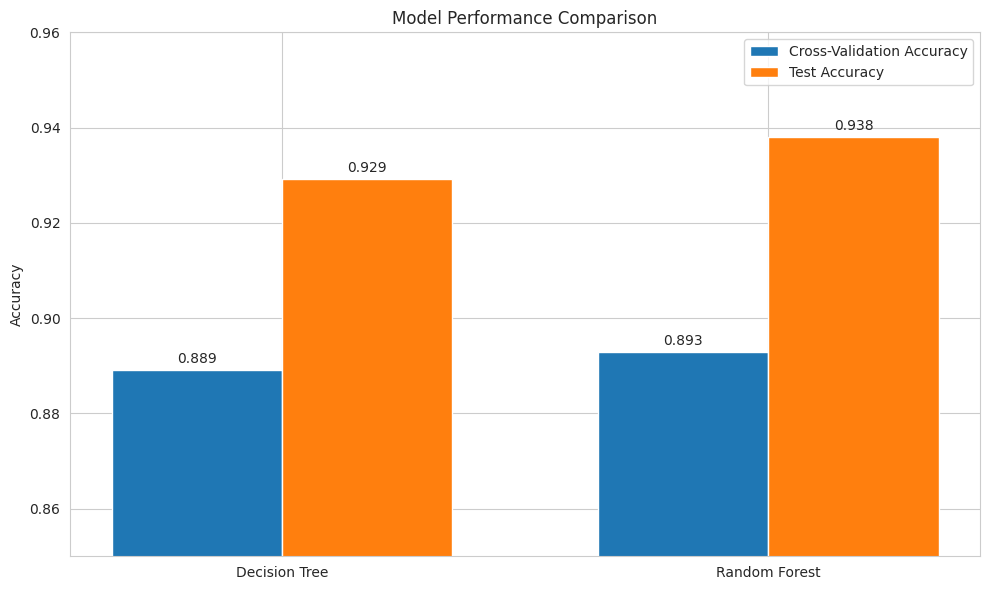

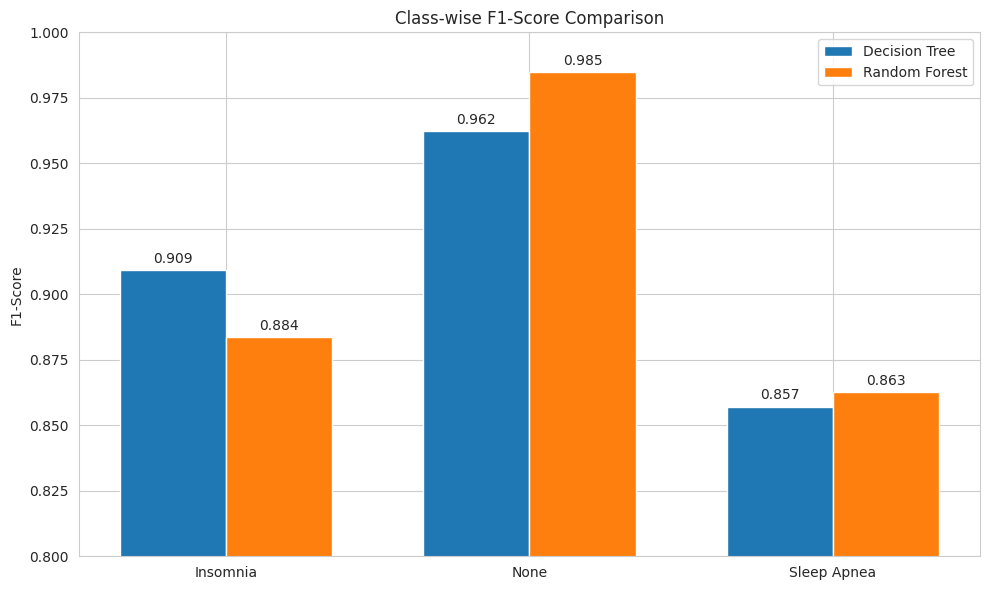

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set the plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
df = pd.read_csv('/home/iismtl519-2/.cache/kagglehub/datasets/uom190346a/sleep-health-and-lifestyle-dataset/versions/2/Sleep_health_and_lifestyle_dataset.csv')

# Data Preprocessing
# Replace missing values in the 'Sleep Disorder' column with 'None'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
# Drop duplicates
df = df.drop_duplicates().reset_index(drop=True)

# Data Exploration
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nClass distribution:")
print(df['Sleep Disorder'].value_counts())
print("\nSummary statistics:")
print(df.describe())

# Feature Engineering
# Split Blood Pressure into Systolic and Diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Encode categorical variables
# Gender encoding
gender_map = {'Male': 0, 'Female': 1}
df['Gender_Encoded'] = df['Gender'].map(gender_map)

# BMI Category encoding
bmi_map = {'Normal': 0, 'Normal Weight': 0, 'Overweight': 1, 'Obese': 2}
df['BMI_Encoded'] = df['BMI Category'].map(bmi_map)

# Occupation - one-hot encoding
occupation_dummies = pd.get_dummies(df['Occupation'], prefix='Occupation')
df = pd.concat([df, occupation_dummies], axis=1)

# Define features and target
X = df.drop(['Person ID', 'Sleep Disorder', 'Blood Pressure', 'Gender', 'BMI Category', 'Occupation'], axis=1)
y = df['Sleep Disorder']

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("\nTarget classes:", le.classes_)

# Data Visualization
plt.figure(figsize=(14, 10))

# 1. Sleep Disorder Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Sleep Disorder', data=df)
plt.title('Sleep Disorder Distribution')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')

# 2. Sleep Duration vs Quality of Sleep by Sleep Disorder
plt.subplot(2, 2, 2)
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', hue='Sleep Disorder', data=df)
plt.title('Sleep Duration vs Quality of Sleep')

# 3. Stress Level Distribution by Sleep Disorder
plt.subplot(2, 2, 3)
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df)
plt.title('Stress Level Distribution by Sleep Disorder')

# 4. Age Distribution by Sleep Disorder
plt.subplot(2, 2, 4)
sns.boxplot(x='Sleep Disorder', y='Age', data=df)
plt.title('Age Distribution by Sleep Disorder')

plt.tight_layout()
plt.show()

# Feature Importance Visualization (using correlation)
plt.figure(figsize=(12, 8))
numeric_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic', 'Gender_Encoded', 'BMI_Encoded']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Standardize numerical features
numeric_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
                    'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic']
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Model 1: Decision Tree (Tree-based model)
print("\n===== Decision Tree Classifier =====")
dt_model = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# Best model from grid search
best_dt = grid_dt.best_estimator_
print(f"Best parameters: {grid_dt.best_params_}")
print(f"Best cross-validation score: {grid_dt.best_score_:.4f}")

# Evaluate Decision Tree on test set
y_pred_dt = best_dt.predict(X_test)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

# Confusion Matrix for Decision Tree
plt.figure(figsize=(10, 8))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance for Decision Tree
dt_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_dt.feature_importances_
})
dt_feature_importance = dt_feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=dt_feature_importance.head(15))
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()

# Model 2: Random Forest (Ensemble learning model)
print("\n===== Random Forest Classifier =====")
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best model from grid search
best_rf = grid_rf.best_estimator_
print(f"Best parameters: {grid_rf.best_params_}")
print(f"Best cross-validation score: {grid_rf.best_score_:.4f}")

# Evaluate Random Forest on test set
y_pred_rf = best_rf.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# Confusion Matrix for Random Forest
plt.figure(figsize=(10, 8))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance for Random Forest
rf_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
})
rf_feature_importance = rf_feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance.head(15))
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# ROC Curve Analysis
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red']
models = [best_dt, best_rf]
model_names = ['Decision Tree', 'Random Forest']

for i, model in enumerate(models):
    y_prob = model.predict_proba(X_test)

    # For multiclass ROC, we need to binarize the output (one-vs-rest approach)
    for class_idx in range(len(le.classes_)):
        fpr, tpr, _ = roc_curve(y_test == class_idx, y_prob[:, class_idx])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[class_idx],
                 lw=2, label=f'{model_names[i]}, {le.classes_[class_idx]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Sleep Disorder Classification')
plt.legend(loc="lower right")
plt.show()

# Model Comparison Table
model_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'CV Accuracy': [grid_dt.best_score_, grid_rf.best_score_],
    'Test Accuracy': [accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf)]
})
print("\nModel Comparison:")
print(model_comparison)

# Additional Analysis: Class-wise performance metrics
print("\nClass-wise Performance Metrics:")
dt_report = classification_report(y_test, y_pred_dt, target_names=le.classes_, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, target_names=le.classes_, output_dict=True)

class_metrics = {
    'Model': [],
    'Class': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for cls in le.classes_:
    class_metrics['Model'].append('Decision Tree')
    class_metrics['Class'].append(cls)
    class_metrics['Precision'].append(dt_report[cls]['precision'])
    class_metrics['Recall'].append(dt_report[cls]['recall'])
    class_metrics['F1-Score'].append(dt_report[cls]['f1-score'])

    class_metrics['Model'].append('Random Forest')
    class_metrics['Class'].append(cls)
    class_metrics['Precision'].append(rf_report[cls]['precision'])
    class_metrics['Recall'].append(rf_report[cls]['recall'])
    class_metrics['F1-Score'].append(rf_report[cls]['f1-score'])

class_metrics_df = pd.DataFrame(class_metrics)
print(class_metrics_df)

# Save the class metrics DataFrame to a CSV file
class_metrics_df.to_csv('model_class_metrics.csv', index=False)

import matplotlib.pyplot as plt
import numpy as np

# Recreating model comparison visualization from the output data
models = ['Decision Tree', 'Random Forest']
cv_acc = [0.889042, 0.892888]
test_acc = [0.929204, 0.938053]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, cv_acc, width, label='Cross-Validation Accuracy')
rects2 = ax.bar(x + width/2, test_acc, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim(0.85, 0.96)

# Add exact values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Recreating class-wise F1-score visualization
classes = ['Insomnia', 'None', 'Sleep Apnea']
dt_f1 = [0.909091, 0.962406, 0.857143]
rf_f1 = [0.883721, 0.984848, 0.862745]

x = np.arange(len(classes))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, dt_f1, width, label='Decision Tree')
rects2 = ax.bar(x + width/2, rf_f1, width, label='Random Forest')

ax.set_ylabel('F1-Score')
ax.set_title('Class-wise F1-Score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()
ax.set_ylim(0.8, 1.0)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()